In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [3]:
# results_FDM = np.load("/Users/tomhartmann/Desktop/studienarbeit-migrationsmodellierung/data/Modellvergleich/FDM-vergleich-10days-LDPE-100-925.npy")
# results_Piringer = np.load("/Users/tomhartmann/Desktop/studienarbeit-migrationsmodellierung/data/Modellvergleich/Piringer-vergleich-10days-LDPE.npy")
results_FDM = np.load("/Users/tomhartmann/Desktop/studienarbeit-migrationsmodellierung/data/Modellvergleich/FDM-vergleich-100days-LDPE-dt-1000-new.npy")
results_Piringer = np.load("/Users/tomhartmann/Desktop/studienarbeit-migrationsmodellierung/data/Modellvergleich/Piringer-vergleich-100days-LDPE.npy")

# results_Piringer = np.array(results_Piringer)-results_Piringer[0]
# Modellparameter nach Piringer
max_time=3600 * 24 * 100   # [s]    Simulationszeit (Sekunden/Stunde * Stunden/Tag * Tag)
timestep = 3600    # [s]           Schrittweite 
time_days_1 = np.arange(0, max_time / (3600 * 24), timestep / (3600 * 24))
time_days_2 = np.linspace(0, 100, len(results_FDM))


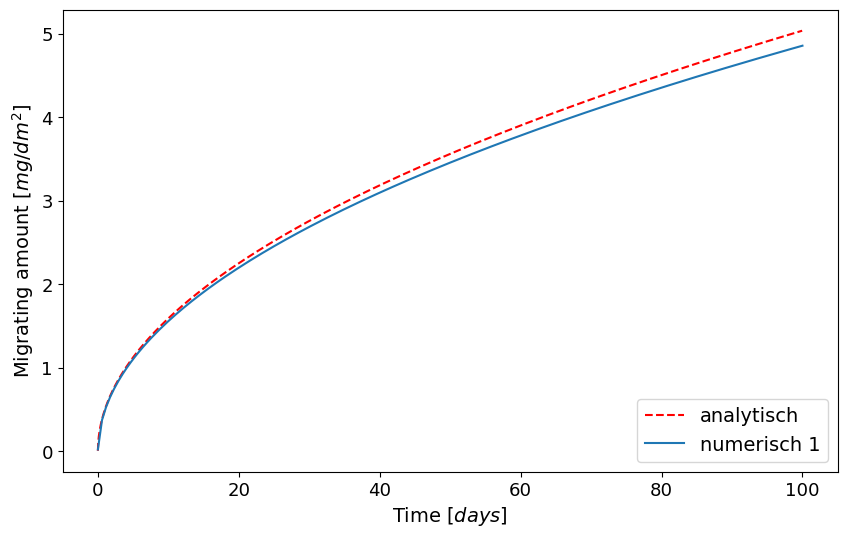

In [4]:
# Plot the area-specific migration results
plt.figure(figsize=(10, 6))
plt.plot(time_days_1, results_Piringer, label = "analytisch", color = "red", linestyle = "--")
plt.plot(time_days_2, results_FDM, label = "numerisch 1")
plt.legend(loc = "lower right", fontsize =14 )
plt.xticks(fontsize=13)  # Ticks der x-Achse
plt.yticks(fontsize=13)  # Ticks der y-Achse
plt.xlabel("Time $[days]$", fontsize = 14)
plt.ylabel("Migrating amount $[mg/dm^2]$", fontsize = 14)
plt.show()

## Abweichung berechnen

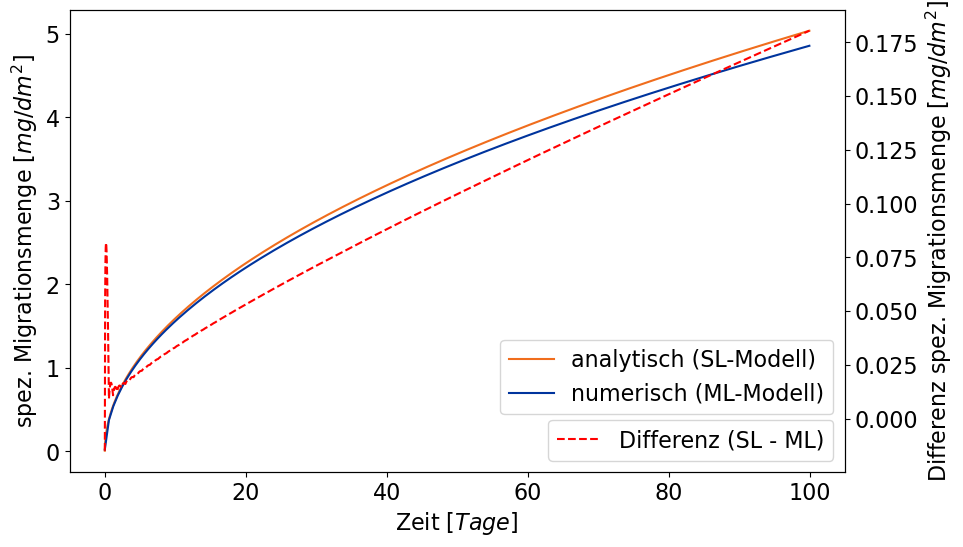

In [6]:
# Interpolation der FDM-Ergebnisse auf die Zeitachse von Piringer
interp_fdm = interp1d(time_days_2, results_FDM, kind='linear')
results_FDM_interpolated = interp_fdm(time_days_1)

# Berechnung der Differenz (Migrationsmenge)
difference = results_Piringer - results_FDM_interpolated

# Plot der Migrationsergebnisse
fig, ax1 = plt.subplots(figsize=(10, 6))

# Linke Achse (Migrationsergebnisse)
ax1.plot(time_days_1, results_Piringer, label="analytisch (SL-Modell)", color='#F06D1D')
ax1.plot(time_days_1, results_FDM_interpolated, label="numerisch (ML-Modell)", color='#00349D')
ax1.set_xlabel("Zeit $[Tage]$", fontsize=16)
ax1.set_ylabel("spez. Migrationsmenge $[mg/dm^2]$", fontsize=16)
ax1.tick_params(axis='y', labelsize=16)
ax1.legend(loc="lower right", fontsize=16, bbox_to_anchor=(1, 0.1))

# Rechte Achse (Differenz der Migrationsmenge)
ax2 = ax1.twinx()
ax2.plot(time_days_1, difference, label="Differenz (SL - ML)", linestyle='--', color='red')
ax2.set_ylabel("Differenz spez. Migrationsmenge $[mg/dm^2]$", fontsize=16)
ax2.tick_params(axis='y', labelsize=16)

# Legende für die zweite Achse
ax2.legend(loc="lower right", fontsize=16)

ax1.tick_params(axis='x', labelsize=16)

plt.xticks(fontsize=18)  # Schriftgröße der X-Achse
# Plot anzeigen
plt.savefig("/Users/tomhartmann/Documents/00_UNI/01_MASTER/STUDIENARBEIT/000_Vektorgrafiken/Modellvergleich/Modellvergleich-100days.pdf", bbox_inches='tight')
plt.show()